In [ ]:
/content/drive/MyDrive/Dog Breed Dataset

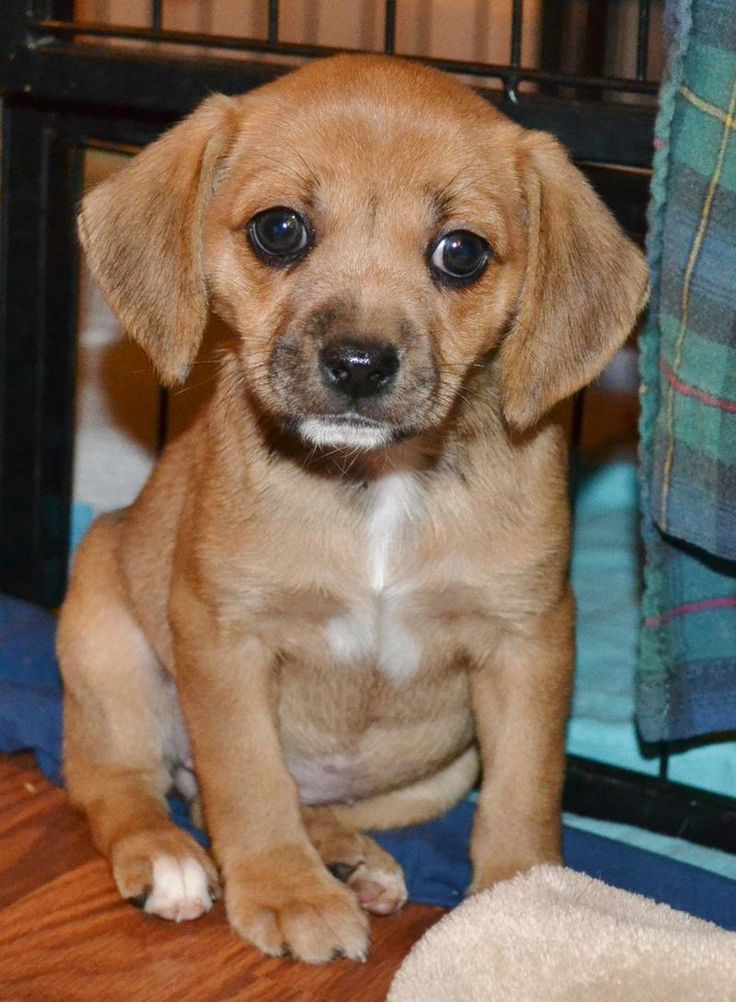

In [ ]:
# Lets check one image
from IPython.display import display, Image
Image("/content/drive/MyDrive/Dog Breed Dataset/Test/Affenhuahua dog/Image_48.jpg")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
# Image dimensions
img_width, img_height = 150, 150

# Path to the main directory
train_data_dir = '/content/drive/MyDrive/Dog Breed Dataset/Train'

In [ ]:

# Image augmentation
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 144 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


In [ ]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='sigmoid'))


In [ ]:
# Define metrics
precision = Precision(name='precision')
recall = Recall(name='recall')

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall])

In [ ]:
def safe_image_generator(generator):
    while True:
        try:
            data, labels = next(generator)
            yield data, labels
        except Exception as e:
            print(f"Skipping a corrupted or unsupported image: {e}")

In [ ]:
train_generator_safe = safe_image_generator(train_generator)
validation_generator_safe = safe_image_generator(validation_generator)

In [ ]:
# Then use these safe generators in model.fit()
history = model.fit(
    train_generator_safe,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator_safe,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)

Epoch 1/10
4/4 [==============================] - 22s 6s/step - loss: 1.4873 - accuracy: 0.2589 - precision: 0.2340 - recall: 0.0982 - val_loss: 1.3554 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 1.2739 - accuracy: 0.4732 - precision: 0.4000 - recall: 0.1607 - val_loss: 1.3808 - val_accuracy: 0.2812 - val_precision: 0.3455 - val_recall: 0.5938
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 1.1011 - accuracy: 0.6641 - precision: 0.5577 - recall: 0.6797 - val_loss: 1.1739 - val_accuracy: 0.5000 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.8293 - accuracy: 0.8036 - precision: 0.8519 - recall: 0.6161 - val_loss: 1.3679 - val_accuracy: 0.5000 - val_precision: 0.3333 - val_recall: 0.2500
Epoch 5/10
4/4 [==============================] - 4s 1s/step - loss: 0.6020 - accuracy: 0.8839 - precision: 0.9130 

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Print the final evaluation metrics
print(f"Final validation loss: {history.history['val_loss'][-1]}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]}")
print(f"Final validation precision: {history.history['val_precision'][-1]}")
print(f"Final validation recall: {history.history['val_recall'][-1]}")
print(f"Final validation F1 score: {2*((history.history['val_precision'][-1]*history.history['val_recall'][-1])/(history.history['val_precision'][-1]+history.history['val_recall'][-1]+1e-7))}")


Final validation loss: 0.23836210370063782
Final validation accuracy: 1.0
Final validation precision: 1.0
Final validation recall: 0.75
Final validation F1 score: 0.857142808163268
